# <font color='blue'>Walmart Trip Type Classification Problem</font>

## Problem Definition

##### Walmart is willing to improve customers' shopping experiences by segmenting their store visits into different trip types. The purpose is to find the customer's intent to given them a more personalized experience

In [1]:
# Setting the working directory
import os
os.chdir("/Users/yashodaagrawal/Desktop/Bikram/Sertis/")
os.getcwd()

'/Users/yashodaagrawal/Desktop/Bikram/Sertis'

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# In the Kaggle site, Walmart has mentioned that it is a transactional dataset of the items customers have purchased 
Trip_data = pd.read_csv("train.csv")

# Exploratory Analysis

In [4]:
# See the first 20 records to get a hang of the dataset
Trip_data.head(20)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,Friday,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0


##### After some internet research, following are the feature descriptions
- TripType : a categorical id representing the type of shopping trip the customer made. This is the ground truth to predict
- VisitNumber : an id corresponding to a single trip by a single customer
- Weekday : the weekday of the trip
- Upc : the UPC number of the product purchased
- ScanCount : the number of the given item that was purchased. A negative value indicates a product return
- DepartmentDescription : a high-level description of the item's department
- FinelineNumber : a more refined category for each of the products, created by Walmart

In [5]:
# Total number of rows and columns in the datasset
 
print(f'Total number of records  :{Trip_data.shape[0]}')
print(f'Total number of Columns  :{Trip_data.shape[1]}')

Total number of records  :647054
Total number of Columns  :7


In [6]:
Trip_data.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [7]:
#report number of missing values for each feature
for col in Trip_data.columns:
    missing_series = Trip_data[col][Trip_data[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)

Upc 4129
DepartmentDescription 1361
FinelineNumber 4129


In [8]:
# See if there are duplicated records in the dataframe
Trip_data[Trip_data.duplicated(keep=False)][:10]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
55,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
59,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
134,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
135,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
460,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
461,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
568,40,274,Friday,4.127197e+09,1,FROZEN FOODS,9100.0
576,40,274,Friday,4.127197e+09,1,FROZEN FOODS,9100.0
604,40,283,Friday,7.940076e+09,1,PERSONAL CARE,1.0
610,40,283,Friday,7.940076e+09,1,PERSONAL CARE,1.0


In [9]:
# Since there are duplicate records we can see in above output, we should drop them
# If need be, we could introduce them back in case of Oversampling requirement, later
Trip_data = Trip_data.drop_duplicates()

# Total number of rows and columns in the datasset after removing duplicates
print(f'Total number of records  :{Trip_data.shape[0]}')
print(f'Total number of Columns  :{Trip_data.shape[1]}')

Total number of records  :641350
Total number of Columns  :7


In [10]:
# Report number of missing values for each feature
for col in Trip_data.columns:
    missing_series = Trip_data[col][Trip_data[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)

Upc 2878
DepartmentDescription 1266
FinelineNumber 2878


In [11]:
# Lookin at this missing value result, and comparing to the missing value result obtained before
# it is obvious that there were a lot of NA or NaN values common in many columns

In [12]:
# Let us take a look in what all columns the missing values are common
# If more columns have missing values for same records, dropping the records will be easy
Trip_data[Trip_data["Upc"].isna() == True][:20]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN
1134,999,484,Friday,NaN,-2,NaN,NaN
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN
1455,5,619,Friday,NaN,1,PHARMACY RX,NaN


In [13]:
# We can see that there are a lot of columns with common NaN values

In [14]:
# Count the total number of records where any of the column values is not available
Trip_data.isnull().any(axis=1).sum()

2878

In [15]:
# Compared to a total of 641350 records (after we removed duplicates), there are just 2878 records
# That have missing values, which is less than 0.5%. Also, we observed that the missing values are
# common across columns, that to 'Upc' and 'FinelineNumber' has the same number of missing values
# So, let us check if they are 100% common missing values in both these columns
len(Trip_data[["Upc", "FinelineNumber"]][Trip_data.Upc.isnull() & Trip_data.FinelineNumber.isnull()])

2878

In [16]:
# Dropping the records with missing values without imputing them (may not be preferred in actual analysis)
# Any sort of information loss is undesirable, but I dropped missing records for quick analysis
Trip_data.dropna(inplace=True)

In [17]:
# Total number of records after dropping the records with missing values
print(f'Total number of records  :{Trip_data.shape[0]}')

Total number of records  :638472


In [18]:
# Sanity check of the dataframe- there should be no missing values now:
Trip_data.isnull().sum()

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64

## Univariate Analysis

### Analysis of response variable: "Trip Type"

In [19]:
# Unique values in Response Variable "Trip Type" column
Trip_data["TripType"].unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,   4,  24,  33,  43,
        31,  27,  34,  18,  29,  44,  19,  23,  22,  28,  14,  12])

In [20]:
# Total Count of unique values in Response Variable, i.e. "Trip Type" column
len(Trip_data["TripType"].unique())

38

In [21]:
# There seems to be 38 classes that we have to classify the data into, 
# Out of which 37 seems to be the actual classes and 
# the class label '999' seems to represent the remaining all classes bucketed into one

In [22]:
# Let us see the min, max and mode of the Trip Type column
print(Trip_data["TripType"].min())
print(Trip_data["TripType"].max())
print(Trip_data["TripType"].mode())

3
999
0    40
dtype: int64


In [23]:
# Labels in "Trip Type" column and their repeat frequencies 
Trip_data["TripType"].value_counts()

40     172849
39      94895
37      38657
38      29356
25      27287
7       23049
8       22635
36      21865
44      20196
42      19256
24      17700
999     16922
9       16606
32      13744
35      12340
5       11191
33       9852
15       7067
3        6814
43       6300
41       5442
30       4821
34       4686
27       4537
21       3979
22       3561
6        3369
20       3091
18       2940
28       2622
26       2479
12       2093
29       2090
31       1752
19       1183
4         889
23        323
14         34
Name: TripType, dtype: int64

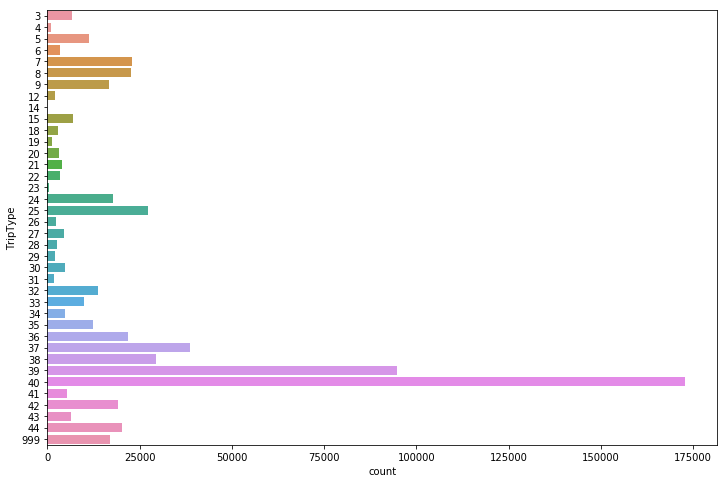

In [24]:
# Viewing the value counts graphically for "Trip Type" column
plt.figure(figsize=(12,8))
sns.countplot(y="TripType", data=Trip_data)
plt.show()

In [25]:
# The percentage occurence of the highest repeated label
Trip_data["TripType"].value_counts().head(1) / len(Trip_data)

40    0.270723
Name: TripType, dtype: float64

In [26]:
# Notice that the Trip Type '40' is almost 27% of all records
# This also implies that the 'Null Accuracy' would be at least 27%
# Overall, classes are quite imbalanced

### Analysis of the variable: "Week Day"

In [27]:
# Unique values in Weekday column
Trip_data["Weekday"].unique()[:, None]

array([['Friday'],
       ['Saturday'],
       ['Sunday'],
       ['Monday'],
       ['Tuesday'],
       ['Wednesday'],
       ['Thursday']], dtype=object)

In [28]:
# Total number of Weekdays is 7 as expected

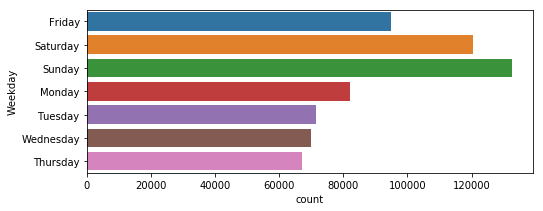

In [29]:
# Total records count with respect to each day of the week
plt.figure(figsize=(8,3))
sns.countplot(y="Weekday", data=Trip_data)
plt.show()

In [30]:
# As expected, Sunday has the highest number of store visits, then comes Saturday and then Friday
# Another observation to note is that, Monday has more visitors then Tuesday, wednesday and Thursday

### Analysis of the variable: "Department Description"

In [31]:
# Unique values in DepartmentDescription column
Trip_data["DepartmentDescription"].unique()[:, None]

array([['FINANCIAL SERVICES'],
       ['SHOES'],
       ['PERSONAL CARE'],
       ['PAINT AND ACCESSORIES'],
       ['DSD GROCERY'],
       ['MEAT - FRESH & FROZEN'],
       ['DAIRY'],
       ['PETS AND SUPPLIES'],
       ['HOUSEHOLD CHEMICALS/SUPP'],
       ['IMPULSE MERCHANDISE'],
       ['PRODUCE'],
       ['CANDY, TOBACCO, COOKIES'],
       ['GROCERY DRY GOODS'],
       ['BOYS WEAR'],
       ['FABRICS AND CRAFTS'],
       ['JEWELRY AND SUNGLASSES'],
       ['MENS WEAR'],
       ['ACCESSORIES'],
       ['HOME MANAGEMENT'],
       ['FROZEN FOODS'],
       ['SERVICE DELI'],
       ['INFANT CONSUMABLE HARDLINES'],
       ['PRE PACKED DELI'],
       ['COOK AND DINE'],
       ['PHARMACY OTC'],
       ['LADIESWEAR'],
       ['COMM BREAD'],
       ['BAKERY'],
       ['HOUSEHOLD PAPER GOODS'],
       ['CELEBRATION'],
       ['HARDWARE'],
       ['BEAUTY'],
       ['AUTOMOTIVE'],
       ['BOOKS AND MAGAZINES'],
       ['SEAFOOD'],
       ['OFFICE SUPPLIES'],
       ['LAWN AND GARDEN'],
     

In [32]:
# Total number of Department Descriptions is 68
len(Trip_data["DepartmentDescription"].unique())

68

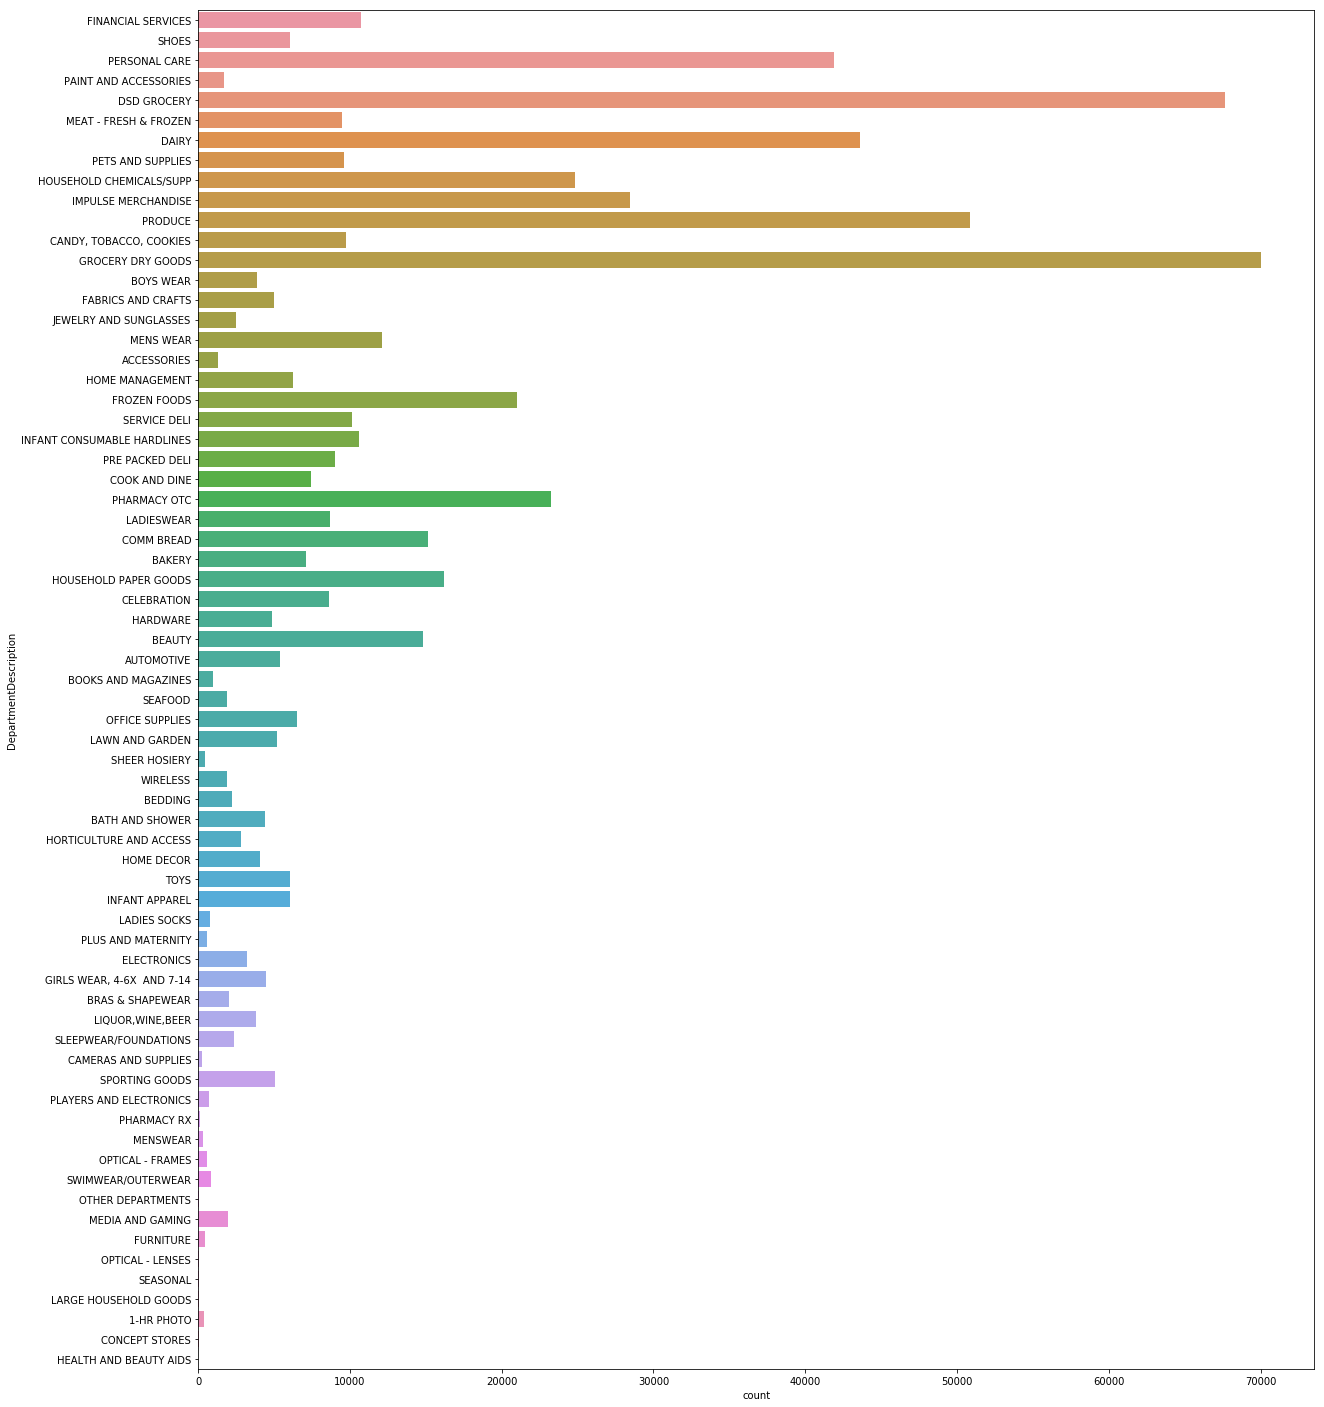

In [33]:
# Graphically viewing the frequency counts of various departments
plt.figure(figsize=(20, 25))
sns.countplot(y="DepartmentDescription", data=Trip_data)
plt.show()

In [34]:
# We can see that there are some of the departments that have marginal visits, they are:
# Other Departments
# Optical Lenses
# Seasonal
# Large Household Goods
# Concept Stores
# Health and Beauty Aids

### Analysis of the variable: "Scan Count"

In [35]:
Trip_data["ScanCount"].unique()

array([ -1,   1,   2,   3,   5,   6,   4,  14,  -2,   9,   7,  10,   8,
        -3,  -5,  11,  16,  -4,  13,  15,  30,  12,  20,  -6, -12,  19,
        46,  23,  -7,  22,  25,  24,  31,  -9,  51,  17,  18,  71, -10])

In [36]:
# Total number of Scan Count is 39
len(Trip_data["ScanCount"].unique())

39

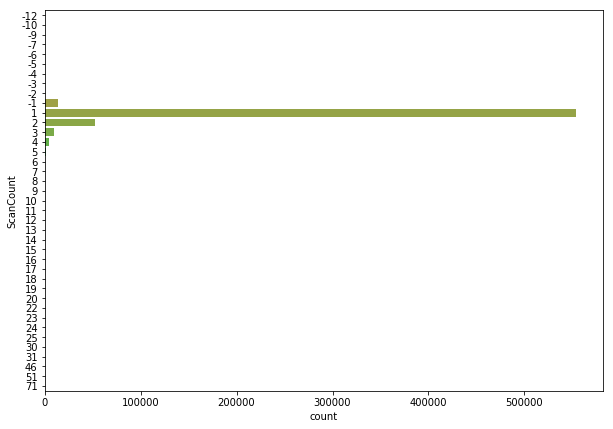

In [37]:
# Graphically viewing the frequency of occurences if various scan count labels
plt.figure(figsize=(10, 7))
sns.countplot(y="ScanCount", data=Trip_data)
plt.show()

In [38]:
# The percentage occurence of the highest repeated label in scan count
Trip_data["ScanCount"].value_counts().head(1) / len(Trip_data)

1    0.867228
Name: ScanCount, dtype: float64

In [39]:
# We can see that the label '1' has the highest frequency and is close to 87% of all transactions
# Other labels such as -1, 2, 3 and 4 have little repeatations
# The remaining all labels are very marginal, could be ignored or bucketed into one category, that we will see later

### Analysis of the variable: "Fineline Number"

In [40]:
len(Trip_data["FinelineNumber"].unique())

5195

In [41]:
# Top 5 labels in "Fineline Number" column and their repeat frequencies 
Trip_data["FinelineNumber"].value_counts().head(5)

5501.0    8228
1508.0    5031
135.0     4509
808.0     4377
0.0       3827
Name: FinelineNumber, dtype: int64

In [42]:
# Notice that these is a Fineline Number '0' repeated 3837 times

In [43]:
# Print the min, max and mode of the "fineline number" column
print(Trip_data["FinelineNumber"].min())
print(Trip_data["FinelineNumber"].max())
print(Trip_data["FinelineNumber"].mode())

0.0
9998.0
0    5501.0
dtype: float64


### Analysis of the variable: "Upc"

In [44]:
len(Trip_data["Upc"].unique())

97714

In [45]:
# Print the min, max and mode of the "Upc" column
print(Trip_data["Upc"].min())
print(Trip_data["Upc"].max())
print(Trip_data["Upc"].mode())

834.0
978970666419.0
0    4011.0
dtype: float64


In [46]:
# labels in "Upc" column and their repeat frequencies 
Trip_data["Upc"].value_counts()

4.011000e+03    7644
6.053886e+10    2494
7.874235e+09    2034
7.874235e+09    1847
4.046000e+03    1642
6.811311e+10    1494
6.053887e+10    1485
3.338320e+09    1383
4.087000e+03    1370
6.053887e+10    1332
4.900000e+09    1011
4.062000e+03     967
4.065000e+03     939
4.900003e+09     872
3.338365e+09     848
7.874235e+09     821
4.900005e+09     793
6.053890e+10     778
6.811316e+10     778
4.078000e+03     737
6.992216e+10     709
7.874211e+09     703
4.093000e+03     696
4.900001e+09     690
2.096650e+10     686
6.053882e+10     644
7.874235e+09     622
7.225004e+09     616
4.051000e+03     613
3.151000e+03     561
                ... 
3.099760e+10       1
8.869443e+10       1
7.265475e+10       1
7.869368e+10       1
7.124916e+09       1
3.742338e+09       1
4.719849e+11       1
7.871552e+09       1
8.492070e+10       1
3.160403e+09       1
8.885107e+10       1
4.138800e+09       1
8.292682e+10       1
8.834492e+10       1
2.149600e+09       1
8.452260e+10       1
7.600137e+09 

In [47]:
# Notice that there are a lot of Upc labels that have just one records each.
# We could also bucket them into one Upc label, that we will see later

In [48]:
# Top 5 labels in "Upc" column and their repeat frequencies 
Trip_data["Upc"].value_counts().head(5)

4.011000e+03    7644
6.053886e+10    2494
7.874235e+09    2034
7.874235e+09    1847
4.046000e+03    1642
Name: Upc, dtype: int64

In [49]:
# Checking the data type of this column, possibly get rid of the 'e' in numbers
# Floating point values with 'e' at times create comparision issues, 
# meaning, same values might report they are not same when we compare them
Trip_data["Upc"].dtype

dtype('float64')

In [50]:
# Check if there are any negative or zero values in Upc column
Trip_data["Upc"][Trip_data["Upc"]<1].count()

0

In [51]:
# There are no negative numbers in this column, let us cross check one more time
print(Trip_data["Upc"].max())
print(Trip_data["Upc"].min())

978970666419.0
834.0


In [52]:
# Let us get rid of the 'e' sign and convert all of them to big integers (int64)
Trip_data["Upc"] = Trip_data["Upc"].astype('int64')
print(Trip_data["Upc"].max())
print(Trip_data["Upc"].min())

978970666419
834


In [53]:
# After converting Upc float values into integers, we did a sanity check and found all in place

In [54]:
# Again Top 7 labels in "Upc" column and their repeat frequencies 
Trip_data["Upc"].value_counts().head(7)

4011           7644
60538862097    2494
7874235186     2034
7874235187     1847
4046           1642
68113107862    1494
60538871457    1485
Name: Upc, dtype: int64

In [55]:
# Again bottom 7 labels in "Upc" column and their repeat frequencies 
Trip_data["Upc"].value_counts().tail(7)

471369833362    1
82161402745     1
2899520364      1
341776165700    1
88741174098     1
88811316013     1
4393545734      1
Name: Upc, dtype: int64

In [56]:
# Notice there are a lot of Upc that have just one record each

### Analysis of the variable: "Visit Number"

In [57]:
len(Trip_data["VisitNumber"].unique())

94247

In [58]:
# Top 7 labels in "Visit Number" column and their repeat frequencies 
Trip_data["VisitNumber"].value_counts().head(7)

72439     205
88011     151
9181      113
60971     112
65792     109
80318     104
178154     97
Name: VisitNumber, dtype: int64

In [59]:
# Again Bottom 7 labels in "Visit Number" column and their repeat frequencies 
Trip_data["VisitNumber"].value_counts().tail(7)

112897    1
151420    1
161659    1
171570    1
145267    1
143216    1
2047      1
Name: VisitNumber, dtype: int64

In [60]:
# Notice there are a lot of VisitNumbers that have just one record each

## Multivariate Analysis

### Upc with other columns

In [61]:
Trip_data[Trip_data["Upc"]==4011].head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
28,8,9,Friday,4011,1,PRODUCE,5501.0
66,9,23,Friday,4011,1,PRODUCE,5501.0
77,39,26,Friday,4011,1,PRODUCE,5501.0
111,15,49,Friday,4011,1,PRODUCE,5501.0
198,37,86,Friday,4011,1,PRODUCE,5501.0


In [62]:
Trip_data[Trip_data["Upc"]==60538862097].head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
73379,25,20725,Monday,60538862097,1,FINANCIAL SERVICES,0.0
73546,999,20786,Monday,60538862097,-1,FINANCIAL SERVICES,0.0
73547,999,20786,Monday,60538862097,1,FINANCIAL SERVICES,0.0
73651,5,20842,Monday,60538862097,1,FINANCIAL SERVICES,0.0
74365,3,21113,Monday,60538862097,1,FINANCIAL SERVICES,0.0


In [63]:
Trip_data[Trip_data["Upc"]==7874235186].head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
100,38,43,Friday,7874235186,1,DAIRY,1508.0
2565,33,1072,Friday,7874235186,1,DAIRY,1508.0
2926,40,1200,Friday,7874235186,1,DAIRY,1508.0
3275,38,1306,Friday,7874235186,1,DAIRY,1508.0
4700,39,1775,Friday,7874235186,1,DAIRY,1508.0


##### Observation from above Analysis
- For specific Upc values, the 'department description' and 'fineline number' seem to have some relation between them

### Visit Number with other columns

In [64]:
Trip_data[Trip_data["VisitNumber"]==72439][:10]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
244440,24,72439,Tuesday,88616687879,1,BOYS WEAR,1025.0
244441,24,72439,Tuesday,7602630673,2,COOK AND DINE,2067.0
244442,24,72439,Tuesday,7214063386,1,PERSONAL CARE,3090.0
244443,24,72439,Tuesday,4393558928,2,MENS WEAR,5542.0
244444,24,72439,Tuesday,4747558605,1,CELEBRATION,5507.0
244445,24,72439,Tuesday,1714586340,1,IMPULSE MERCHANDISE,8904.0
244447,24,72439,Tuesday,82506302901,1,BATH AND SHOWER,1500.0
244448,24,72439,Tuesday,7001062236,1,MENS WEAR,8064.0
244449,24,72439,Tuesday,89811500266,4,INFANT CONSUMABLE HARDLINES,2123.0
244450,24,72439,Tuesday,36373636304,1,INFANT CONSUMABLE HARDLINES,2114.0


In [65]:
# Let us see some more records
Trip_data[Trip_data["VisitNumber"]==72439][:30]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
244440,24,72439,Tuesday,88616687879,1,BOYS WEAR,1025.0
244441,24,72439,Tuesday,7602630673,2,COOK AND DINE,2067.0
244442,24,72439,Tuesday,7214063386,1,PERSONAL CARE,3090.0
244443,24,72439,Tuesday,4393558928,2,MENS WEAR,5542.0
244444,24,72439,Tuesday,4747558605,1,CELEBRATION,5507.0
244445,24,72439,Tuesday,1714586340,1,IMPULSE MERCHANDISE,8904.0
244447,24,72439,Tuesday,82506302901,1,BATH AND SHOWER,1500.0
244448,24,72439,Tuesday,7001062236,1,MENS WEAR,8064.0
244449,24,72439,Tuesday,89811500266,4,INFANT CONSUMABLE HARDLINES,2123.0
244450,24,72439,Tuesday,36373636304,1,INFANT CONSUMABLE HARDLINES,2114.0


In [66]:
Trip_data[Trip_data["VisitNumber"]==88011][:30]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
292488,40,88011,Friday,3500055372,1,PERSONAL CARE,9108.0
292489,40,88011,Friday,5100001210,2,GROCERY DRY GOODS,2401.0
292490,40,88011,Friday,4288741184,1,IMPULSE MERCHANDISE,8296.0
292491,40,88011,Friday,1740010667,1,GROCERY DRY GOODS,3813.0
292492,40,88011,Friday,1300000640,1,GROCERY DRY GOODS,2301.0
292493,40,88011,Friday,2840006406,1,DSD GROCERY,7002.0
292494,40,88011,Friday,3800077127,1,GROCERY DRY GOODS,3600.0
292495,40,88011,Friday,30997366400,1,PERSONAL CARE,5414.0
292496,40,88011,Friday,4878916215,1,HOUSEHOLD PAPER GOODS,7040.0
292497,40,88011,Friday,7343500004,1,COMM BREAD,3791.0


In [67]:
Trip_data[Trip_data["VisitNumber"]==9181][:30]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
29800,40,9181,Saturday,4460000938,1,HOUSEHOLD CHEMICALS/SUPP,6010.0
29801,40,9181,Saturday,3700033550,1,HOUSEHOLD CHEMICALS/SUPP,9055.0
29802,40,9181,Saturday,7874203269,1,HOUSEHOLD PAPER GOODS,6206.0
29803,40,9181,Saturday,4135,1,PRODUCE,1214.0
29804,40,9181,Saturday,7172572836,1,PRODUCE,177.0
29805,40,9181,Saturday,2840018476,1,DSD GROCERY,4451.0
29806,40,9181,Saturday,3600042489,1,PHARMACY OTC,274.0
29807,40,9181,Saturday,7539102394,1,SEAFOOD,1053.0
29808,40,9181,Saturday,3384400448,1,GROCERY DRY GOODS,4293.0
29809,40,9181,Saturday,79316591160,1,HOUSEHOLD CHEMICALS/SUPP,4510.0


##### Observation from above 'Visit Number' Analysis
- For specific Visit Numbers, the 'Week Day' and the 'Trip Type' are exactly the same
- This indicates that there might be some relation between them, that we must find out
- for just 38 unique TripType classes, there are 95674 unique VisitNumbers, so there is one to many relationship

In [68]:
# Let us confirm the one to many relationship. For the above outcome where Trip Type is 40,
# Let us find other records where Trip Type is 40, but the visit number is not 9181
Trip_data[(Trip_data["TripType"]==40) & (Trip_data["VisitNumber"]!=9181)][:10]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
222,40,98,Friday,7874201706,1,DSD GROCERY,3562.0
223,40,98,Friday,3400001314,1,"CANDY, TOBACCO, COOKIES",78.0
224,40,98,Friday,7874200645,1,DSD GROCERY,4672.0
225,40,98,Friday,60538815805,2,SHOES,4815.0
226,40,98,Friday,7431255366,1,PHARMACY OTC,502.0
227,40,98,Friday,68113104849,1,BEAUTY,3907.0
228,40,98,Friday,81655901251,1,PERSONAL CARE,3123.0
229,40,98,Friday,7874209667,1,HOUSEHOLD PAPER GOODS,6010.0
230,40,98,Friday,7874209664,1,HOUSEHOLD PAPER GOODS,6020.0
231,40,98,Friday,4000048815,1,"CANDY, TOBACCO, COOKIES",79.0


##### Above analysis shows that our hypothesis on the relation between Visit Number and Trip Type may NOT hold true
#####  

### TripType and Weekday

In [69]:
# From other analysis above, there seems to be some relation between TripType and Week Day
# If at all there is a relationship, it has to be one to many, as there are only 7 days and 38 TripTypes

In [70]:
Grouped_by_Weekday = Trip_data.groupby(['Weekday', 'TripType'])['TripType'].last()

In [71]:
Grouped_by_Weekday = Grouped_by_Weekday.to_frame()

In [72]:
Monday_TripTypes = pd.Series(Grouped_by_Weekday.loc["Monday"].T.squeeze())
print("Monday")
print(Monday_TripTypes.values)

Monday
[  3   4   5   6   7   8   9  12  14  15  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44 999]


In [73]:
Friday_TripTypes = pd.Series(Grouped_by_Weekday.loc["Friday"].T.squeeze())
print("Friday")
print(Friday_TripTypes.values)

Friday
[  3   4   5   6   7   8   9  12  14  15  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44 999]


In [74]:
Saturday_TripTypes = pd.Series(Grouped_by_Weekday.loc["Saturday"].T.squeeze())
print("Saturday")
print(Saturday_TripTypes.values)

Saturday
[  3   4   5   6   7   8   9  12  14  15  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44 999]


In [75]:
Sunday_TripTypes = pd.Series(Grouped_by_Weekday.loc["Sunday"].T.squeeze())
print("Sunday")
print(Sunday_TripTypes.values)

Sunday
[  3   4   5   6   7   8   9  12  15  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
 999]


##### Above analysis shows that our hypothesis on the relation between week day and Trip Type may NOT hold true
-

### TripType and Department Description

In [76]:
# Going by the intution, 'Departments' should be the important feature in classifying TripTypes
# This is because it indicates the purpose of the trip, what items the customer is interested in buying

In [77]:
# Let us get the top 10 highfrequent TripTypes
Trip_data["TripType"].value_counts().head(10)

40    172849
39     94895
37     38657
38     29356
25     27287
7      23049
8      22635
36     21865
44     20196
42     19256
Name: TripType, dtype: int64

In [78]:
Trip_data[Trip_data["TripType"]==40]["DepartmentDescription"].value_counts().head()

GROCERY DRY GOODS    32478
DSD GROCERY          21928
DAIRY                17263
PRODUCE              16603
PERSONAL CARE         9889
Name: DepartmentDescription, dtype: int64

In [79]:
# Notice above that TripType 40 is primarily associated with Grocery Items, Dairy and Produce

In [80]:
Trip_data[Trip_data["TripType"]==25]["DepartmentDescription"].value_counts().head()

MENS WEAR                     5339
LADIESWEAR                    3690
GIRLS WEAR, 4-6X  AND 7-14    1819
BOYS WEAR                     1675
PERSONAL CARE                 1528
Name: DepartmentDescription, dtype: int64

In [81]:
# Notice above that TripType 25 is associated with apparels- Mens Wear, Ladies Wear, Girls Wear, Boys Wear etc

In [82]:
Trip_data[Trip_data["TripType"]==31]["DepartmentDescription"].value_counts().head()

WIRELESS               985
IMPULSE MERCHANDISE    121
DSD GROCERY             70
PERSONAL CARE           52
GROCERY DRY GOODS       51
Name: DepartmentDescription, dtype: int64

In [83]:
# Notice above that TripType 31 is primarily associated with Wireless and Impulse merchandise

In [84]:
Trip_data[Trip_data["TripType"]==36]["DepartmentDescription"].value_counts().head()

PERSONAL CARE          8613
BEAUTY                 3839
PHARMACY OTC           1592
IMPULSE MERCHANDISE    1167
DSD GROCERY             994
Name: DepartmentDescription, dtype: int64

In [85]:
# Notice above that TripType 36 is primarily associated with Personal Care, Beauty and OTC Pharma

##### We can conclude that Department Description is one of the most important predictors

### ScanCount with other features

In [86]:
# Negative Scan Count indicates the return of the products
# Total number of return transactions in the data are
len(Trip_data[Trip_data["ScanCount"] < 1])

14950

In [87]:
# Let us take a look at return transactions
Trip_data[Trip_data["ScanCount"] < 1][:10]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565.0
14,26,8,Friday,88679300501,-1,PAINT AND ACCESSORIES,3504.0
297,9,132,Friday,64541613597,-1,CELEBRATION,6.0
299,9,132,Friday,6700886206,-1,CELEBRATION,6.0
300,999,133,Friday,9933894257,-1,LADIESWEAR,1180.0
369,999,182,Friday,5473282047,-1,HARDWARE,8410.0
376,999,190,Friday,4316875342,-1,HARDWARE,4513.0
389,7,199,Friday,4138309073,-1,DAIRY,1505.0
404,38,210,Friday,2200012000,-1,"CANDY, TOBACCO, COOKIES",221.0


In [88]:
# Suspecting that return requests would typically be of some specific TripTypes, let us validate this hypothesis
Trip_data[Trip_data["ScanCount"] < 1]["TripType"].unique()

array([999,  26,   9,   7,  38,   8,  39,  33,  20,  25,  40,  43,  37,
        24,  36,   4,  15,  41,  34,  14,  32,   5,   6,  22,  19,  35,
        29,  27,  31,  30,  18,  42,  44,  21,   3,  28,  23,  12])

In [89]:
# Above result shows that return requests are present in almost all TripTypes

In [90]:
# Let us see the frequency counts to conclude on whether return transactions have some specific Trip Types
Trip_data[Trip_data["ScanCount"] < 1]["TripType"].value_counts()

999    9367
40     1104
39      759
37      322
25      315
9       311
8       304
7       233
38      217
36      197
42      193
24      190
32      159
44      144
5       113
35      106
33       99
22       63
41       62
15       60
43       57
3        54
27       52
21       51
6        50
34       45
20       45
31       44
30       42
18       35
28       34
26       32
29       32
12       21
19       18
23       11
4         8
14        1
Name: TripType, dtype: int64

In [91]:
# Let us see if there are customers classified into TripType 999 but did not go for return of products
len(Trip_data[(Trip_data["ScanCount"] >= 1) & (Trip_data["TripType"]==999)])

7555

In [92]:
# It is very clear from the above analysis that TripType 999 has
# almost an equal mix of customers who went to buy products and who went to return products
# However, TripType 999 has the majority of customers who went to return items, compared to other TripTypes

# ** This indicates marking the customers if they went to return products 
#     or went for usual shopping could be a new feature that we can introduce

In [93]:
# Let us see if there is any specific day of the week that customers prefer to return products
Trip_data[Trip_data["ScanCount"] < 1]["Weekday"].value_counts()

Sunday       2706
Saturday     2691
Friday       2341
Monday       1864
Wednesday    1808
Tuesday      1808
Thursday     1732
Name: Weekday, dtype: int64

In [94]:
# From the above alalysis, it seems that the customers prefer Fridays and the Weekends to return products
# compared to other week days

# ** This indicates marking the customers if they went shopping on a weekend could be a new feature that we can introduce

# Model Building

## Base Line Modeling

##### Quickly building a model to get a high level understanding. Feature Engineering etc. will be the next steps

In [97]:
# Some Observations from our analysis that is important in selecting right model
#-------------------------------------------------------------------------------

# Almost all variables are categorical, or can be considered categorical
# Considering the number of labels, dummifying the variables will create thousands of new features
# By one-hot encoding a categorical variable, we are inducing sparsity into the dataset which is undesirable
# Algorithms such as Logistic Regression may not work well
# SVM with RBF kernel may perform well, but considering the size of the data, it may not be feasible on my laptop
# Tree based models might work best, so the options are Trees, Random Forest, Gradient Boosting and XGBoost

In [98]:
Trip_data.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [99]:
Trip_data.head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,60538815980,1,SHOES,8931.0
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0


In [100]:
Trip_data_dmy = pd.get_dummies(Trip_data, columns =['Weekday', 'DepartmentDescription'], drop_first=True)

In [101]:
Trip_data_dmy.head(3)

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,999,5,68113152929,-1,1000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,60538815980,1,8931.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,7410811099,1,4504.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X = Trip_data_dmy.iloc[:,1:]
y = Trip_data_dmy.iloc[:,0]

In [103]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [105]:
# Let us build a complete tree by overfitting and find the height
tree_model = DecisionTreeClassifier(criterion = "gini")
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
# Print Tree Model Accuracy on training data:
print(f'Tree Model Accuracy on training data: \
      {tree_model.score(X_train, y_train)}')

Tree Model Accuracy on training data:       1.0


In [107]:
# Notice that the training accuracy is 100%, so overfitted as planned

In [108]:
treeObj = tree_model.tree_
print("Total nodes: ", treeObj.node_count)
print("Tree Height is: ", treeObj.max_depth)

Total nodes:  599205
Tree Height is:  103


In [109]:
# The Tree Height gives us an understanding of where to Prune, as we now know the height of the tree

In [111]:
# Let us build another tree by applying some level of prunning
tree_model_60 = DecisionTreeClassifier(criterion = "gini", max_depth=60)
tree_model_60.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=60,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
# Print Tree Model Accuracy on training data with depth 60:
print(f'Tree Model (depth 60) Accuracy on training data: \
      {tree_model_60.score(X_train, y_train)}')

Tree Model (depth 60) Accuracy on training data:       0.975378716686088


In [113]:
# Print Tree Model Accuracy on Test data with depth 60:
print(f'Tree Model (depth 60) Accuracy on test data: \
      {tree_model_60.score(X_test, y_test)}')

Tree Model (depth 60) Accuracy on test data:       0.3231089225525943


In [114]:
# The testing data accuracy is very poor!
# Let us quickly test out a forest model

In [116]:
forest_model_50_50 = RandomForestClassifier(criterion = "gini", max_depth=50, n_estimators=50)
forest_model_50_50.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
# Print Random Forest Model Accuracy on training data:
print(f'Random Forest Model with depth 50 and 50 Estimators -  Accuracy on training data: \
      {forest_model_50_50.score(X_train, y_train)}')

Random Forest Model with depth 50 and 50 Estimators -  Accuracy on training data:       0.9932735238715767


In [118]:
# Print Random Forest Model Accuracy on Testing data:
print(f'Random Forest Model with depth 50 and 50 Estimators-  Accuracy on Testing data: \
      {forest_model_50_50.score(X_test, y_test)}')

Random Forest Model with depth 50 and 50 Estimators-  Accuracy on Testing data:       0.346533598967535


#### Observation from above models
- The model performance on training data is very good, but on test data it is not generalizing well
- A tree based approach that we chose seem to be the right choice
- Model performance might increase with hyperparameter tuning on Random forest
- Gradient Boosting (or XGBoost) should definitely perform a lot better
- Despite the Algorithmic tuning approaches, Feature Engineering should be our next step

## Feature Engineering: Round-1

In [119]:
# Again, let us view the top few records to recollect how the data is
Trip_data.head(4)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,60538815980,1,SHOES,8931.0
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565.0


#### TripType

In [120]:
# Find the least frequent labels in TripType
Trip_data["TripType"].value_counts().tail(3)

4     889
23    323
14     34
Name: TripType, dtype: int64

In [121]:
# There are barely 34 records for the TripType=14, which is definitely an issue for training
# Checking the records with TripType 14 to find any pattern
Trip_data[Trip_data["TripType"]==14]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
5938,14,2154,Friday,3400000241,1,IMPULSE MERCHANDISE,100.0
5939,14,2154,Friday,84010919709,2,IMPULSE MERCHANDISE,8904.0
5940,14,2154,Friday,84010919709,1,IMPULSE MERCHANDISE,8904.0
5942,14,2154,Friday,84010919709,-2,IMPULSE MERCHANDISE,8904.0
5943,14,2154,Friday,84792200905,1,PETS AND SUPPLIES,1169.0
5944,14,2154,Friday,78436978096,1,PETS AND SUPPLIES,1169.0
5945,14,2154,Friday,1780014911,1,PETS AND SUPPLIES,232.0
40937,14,12127,Saturday,692302610057,2,FABRICS AND CRAFTS,7949.0
40938,14,12127,Saturday,692302610057,1,FABRICS AND CRAFTS,7949.0
40939,14,12127,Saturday,692302610055,2,FABRICS AND CRAFTS,7949.0


In [122]:
# TripType 14 has got barely 34 records associated with it
# Though could not conclude on what to do with TripType 14 at the moment,
# We might have to club it with TripType 999, that we will see later in Round-2 or Round-3 of feature engineering

#### Visit Number

In [123]:
# VisitNumber : an id corresponding to a single trip by a single customer
# Total unique Visit Numbers are
len(Trip_data["VisitNumber"].unique())

94247

In [124]:
print(Trip_data["VisitNumber"].min())
print(Trip_data["VisitNumber"].max())
print(Trip_data["VisitNumber"].mode())

5
191347
0    72439
dtype: int64


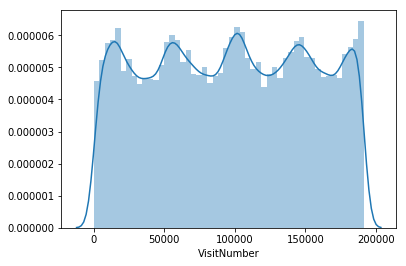

In [125]:
sns.distplot(Trip_data["VisitNumber"])

In [126]:
# Find the least frequent labels in VisitNumber
Trip_data["VisitNumber"].value_counts().tail(10)

188270    1
149033    1
121101    1
112897    1
151420    1
161659    1
171570    1
145267    1
143216    1
2047      1
Name: VisitNumber, dtype: int64

In [127]:
len(Trip_data[Trip_data["VisitNumber"]==5])

1

In [128]:
Trip_data["VisitNumber"].quantile([0.01, 0.05, 0.1, 0.3, 0.5, 0.7, .9])

0.01      2319.0
0.05      9891.0
0.10     18163.0
0.30     57903.3
0.50     97162.0
0.70    135297.8
0.90    173799.9
Name: VisitNumber, dtype: float64

In [129]:
# Notice that there are very few records with Visit Number being a small value.
# This means that the overall dataset is of customers who have visited Walmart many times already

In [130]:
# Let us see how many number of records are below one percentile, i.e. visit number below 2319
len(Trip_data[Trip_data["VisitNumber"] <= 2319])

6407

In [131]:
Trip_data[Trip_data["VisitNumber"] <= 2319]["TripType"].unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,   4,  24,  33,  43,
        31,  27,  34,  18,  29,  44,  19,  23,  22,  28,  14])

In [132]:
# Notice that the first one percentile Visit Numbers have almost all TripTypes, and not specific TripTypes
# Creating a new feature (CustType) that would indicate low frequent, moderate frequent and high frequent customers may help

In [133]:
Trip_data['CustType'] = Trip_data.VisitNumber.apply(lambda x: 0 if x <= 2319 else 2 if x > 173799 else 1)

In [134]:
Trip_data[Trip_data["VisitNumber"] > 173799].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType
582431,3,173800,Friday,68113163351,2,FINANCIAL SERVICES,275.0,2
582432,3,173800,Friday,60538896309,2,FINANCIAL SERVICES,276.0,2


In [135]:
Trip_data[Trip_data["VisitNumber"] < 2319].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0,0
1,30,7,Friday,60538815980,1,SHOES,8931.0,0


In [136]:
Trip_data[(Trip_data["VisitNumber"] > 2319) & (Trip_data["VisitNumber"] < 173799)].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType
6518,3,2320,Friday,60538896309,2,FINANCIAL SERVICES,276.0,1
6519,3,2320,Friday,68113163351,2,FINANCIAL SERVICES,275.0,1


In [137]:
# We will also see later in Round-2/3 of feature engineering if there is any scope of dealing with 
# less frequent records pertaining to VisitNumber. Reducing number of labels might help.

#### Week Day

In [138]:
# We have already seen the count data with respect to each day of the week
# All days have good amount of customers, and Weekends have higher number of customers
# So, creating a new feature (isWeekend) where Week Day is either Saturday or Sunday

In [139]:
Trip_data['Weekday'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [140]:
Trip_data['isWeekend'] = Trip_data.Weekday.apply(lambda x: 1 if (x == 'Saturday') | (x == 'Sunday') else 0)

In [141]:
Trip_data[Trip_data["Weekday"] == 'Saturday'].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend
19949,24,6216,Saturday,63676504858,1,BATH AND SHOWER,9912.0,1,1
19950,24,6216,Saturday,4316867454,1,HARDWARE,732.0,1,1


In [142]:
Trip_data[Trip_data["Weekday"] == 'Sunday'].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend
43565,25,12899,Sunday,4032625698,1,LADIESWEAR,663.0,1,1
43566,25,12899,Sunday,880614469413,1,LADIESWEAR,324.0,1,1


In [143]:
Trip_data[Trip_data["Weekday"] == 'Monday'].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend
70659,7,19709,Monday,7874214098,1,GROCERY DRY GOODS,3559.0,1,0
70660,7,19709,Monday,4119640482,2,GROCERY DRY GOODS,3108.0,1,0


#### Scan Count

In [144]:
# We learnt that the negative Scan Counts indicate product return
# So, we can create a feature (isReturn) to indicate if it was a return transaction
Trip_data['isReturn'] = Trip_data.ScanCount.apply(lambda x: 1 if x < 1 else 0)

In [145]:
Trip_data[Trip_data["ScanCount"] < 1].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0,0,0,1
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565.0,0,0,1


In [146]:
Trip_data[Trip_data["ScanCount"] >= 1].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn
1,30,7,Friday,60538815980,1,SHOES,8931.0,0,0,0
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0,0,0,0


In [147]:
# We have now created a new feature 'isReturn' to mark the transactions that were for return of products

In [148]:
# We also see that there are customers who went to buy a lot of products (having higher scan counts)
# There could be proper planning by the customers to go for bulk shopping. 
# So, it might help if we introduce a bulkBuy feature to capture this information

In [149]:
Trip_data["ScanCount"].value_counts()

 1     553701
 2      52771
-1      13920
 3       9406
 4       4525
 5       1377
 6        864
-2        791
 8        246
 7        228
-3        136
 10       130
 9         88
-4         73
 12        60
 11        45
-5         16
 14        15
 13        13
 15        12
-6          9
 20         7
 16         6
 18         4
 24         4
 19         4
 25         3
 17         3
 23         3
 22         2
-9          2
 30         1
 46         1
 51         1
 71         1
-12         1
-10         1
-7          1
 31         1
Name: ScanCount, dtype: int64

In [150]:
# Here we can also create another feature (bulkBuy) if the scan count is more than 4
Trip_data['bulkBuy'] = Trip_data.ScanCount.apply(lambda x: 1 if x >= 5 else 0)

In [151]:
Trip_data[Trip_data["ScanCount"] >= 5].head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy
121,15,55,Friday,87458603507,5,IMPULSE MERCHANDISE,8023.0,0,0,0,1
132,26,61,Friday,7535309226,5,HARDWARE,5525.0,0,0,0,1


In [152]:
Trip_data[Trip_data["ScanCount"] <= 4].head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0,0,0,1,0
1,30,7,Friday,60538815980,1,SHOES,8931.0,0,0,0,0
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0,0,0,0,0


In [153]:
# Considering the distribution of this feature, we see a lot of labels with extremely low records.
# This is again another problem when it comes to model performance
# We will see in Round-2/3 of feature engineering if we need to club them into one category

#### Department Description

In [154]:
# We learnt that there are 68 Department Descriptions. 
# This when dummified, ends up creating 67 dummified columns which is very sparse

In [155]:
# Let us find the departments with minimal frequencies of transactions
Trip_data["DepartmentDescription"].value_counts().tail(20)

PAINT AND ACCESSORIES      1698
ACCESSORIES                1294
BOOKS AND MAGAZINES         990
SWIMWEAR/OUTERWEAR          859
LADIES SOCKS                771
PLAYERS AND ELECTRONICS     683
PLUS AND MATERNITY          583
OPTICAL - FRAMES            573
FURNITURE                   467
SHEER HOSIERY               430
1-HR PHOTO                  387
MENSWEAR                    327
CAMERAS AND SUPPLIES        221
PHARMACY RX                 151
OPTICAL - LENSES             85
LARGE HOUSEHOLD GOODS        77
CONCEPT STORES               35
SEASONAL                     29
OTHER DEPARTMENTS            29
HEALTH AND BEAUTY AIDS        2
Name: DepartmentDescription, dtype: int64

In [156]:
# Notice that there are a few departments with very few records associated with them.
# This is definitely not good for the model. 

In [157]:
# Notice that we have 'OPTICAL - LENSES' and 'OPTICAL - FRAMES' as two categories
# Considering the trip Type classification, if we merge these two labels, it might help

In [158]:
Trip_data['DepartmentDescription'].replace('OPTICAL - LENSES', 'OPTICALS', inplace=True)
Trip_data['DepartmentDescription'].replace('OPTICAL - FRAMES', 'OPTICALS', inplace=True)

In [159]:
# Let us take a look at all Departments to see if there are further scopes of merging
Trip_data["DepartmentDescription"].unique()[:, None]

array([['FINANCIAL SERVICES'],
       ['SHOES'],
       ['PERSONAL CARE'],
       ['PAINT AND ACCESSORIES'],
       ['DSD GROCERY'],
       ['MEAT - FRESH & FROZEN'],
       ['DAIRY'],
       ['PETS AND SUPPLIES'],
       ['HOUSEHOLD CHEMICALS/SUPP'],
       ['IMPULSE MERCHANDISE'],
       ['PRODUCE'],
       ['CANDY, TOBACCO, COOKIES'],
       ['GROCERY DRY GOODS'],
       ['BOYS WEAR'],
       ['FABRICS AND CRAFTS'],
       ['JEWELRY AND SUNGLASSES'],
       ['MENS WEAR'],
       ['ACCESSORIES'],
       ['HOME MANAGEMENT'],
       ['FROZEN FOODS'],
       ['SERVICE DELI'],
       ['INFANT CONSUMABLE HARDLINES'],
       ['PRE PACKED DELI'],
       ['COOK AND DINE'],
       ['PHARMACY OTC'],
       ['LADIESWEAR'],
       ['COMM BREAD'],
       ['BAKERY'],
       ['HOUSEHOLD PAPER GOODS'],
       ['CELEBRATION'],
       ['HARDWARE'],
       ['BEAUTY'],
       ['AUTOMOTIVE'],
       ['BOOKS AND MAGAZINES'],
       ['SEAFOOD'],
       ['OFFICE SUPPLIES'],
       ['LAWN AND GARDEN'],
     

In [160]:
# Notice that we have 'MENS WEAR' and 'MENSWEAR' as two categories. Let us merge them
Trip_data['DepartmentDescription'].replace('MENS WEAR', 'MENSWEAR', inplace=True)

In [161]:
# There are many other departments that I see scope in merging, but will park that till Feature Engineering Round 2/3

In [162]:
# Let us create a list of less frequent departments so we can merge them all into 'OTHER DEPARTMENTS' category
less_freq_dept = ['LARGE HOUSEHOLD GOODS', 'CONCEPT STORES', 'SEASONAL', 'HEALTH AND BEAUTY AIDS']
for dep in less_freq_dept:
    Trip_data['DepartmentDescription'].replace(dep, 'OTHER DEPARTMENTS', inplace=True)

In [163]:
# Sanity check to see of less_freq_dept are now merged with 'OTHER DEPARTMENTS'
Trip_data["DepartmentDescription"].value_counts().tail(20)

SLEEPWEAR/FOUNDATIONS      2352
BEDDING                    2243
BRAS & SHAPEWEAR           2018
MEDIA AND GAMING           1986
SEAFOOD                    1913
WIRELESS                   1889
PAINT AND ACCESSORIES      1698
ACCESSORIES                1294
BOOKS AND MAGAZINES         990
SWIMWEAR/OUTERWEAR          859
LADIES SOCKS                771
PLAYERS AND ELECTRONICS     683
OPTICALS                    658
PLUS AND MATERNITY          583
FURNITURE                   467
SHEER HOSIERY               430
1-HR PHOTO                  387
CAMERAS AND SUPPLIES        221
OTHER DEPARTMENTS           172
PHARMACY RX                 151
Name: DepartmentDescription, dtype: int64

#### Encoding and Dummifying

In [164]:
# Dummifying the Weekday we already tried, let us try encoding them now
Trip_data['Weekday'] = Trip_data['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5,
"Saturday": 6, "Sunday": 7})

In [165]:
Trip_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy
0,999,5,5,68113152929,-1,FINANCIAL SERVICES,1000.0,0,0,1,0
1,30,7,5,60538815980,1,SHOES,8931.0,0,0,0,0
2,30,7,5,7410811099,1,PERSONAL CARE,4504.0,0,0,0,0
3,26,8,5,2238403510,2,PAINT AND ACCESSORIES,3565.0,0,0,0,0
4,26,8,5,2006613744,2,PAINT AND ACCESSORIES,1017.0,0,0,0,0


In [166]:
# There no better way but to dummify DepartmentDescription
Trip_data_dmy_v1 = pd.get_dummies(Trip_data, columns =['DepartmentDescription'], drop_first=True)

In [167]:
Trip_data_dmy_v1.head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy,...,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,999,5,5,68113152929,-1,1000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,5,60538815980,1,8931.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,5,7410811099,1,4504.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building: Round-1

In [168]:
X = Trip_data_dmy_v1.iloc[:,1:]
y = Trip_data_dmy_v1.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [169]:
forest_model_40 = RandomForestClassifier(criterion = "gini", max_depth=40, n_estimators=50)
forest_model_40.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
# Print Random Forest Model Accuracy on training data:
print(f'Random Forest Model with depth 40 -  Accuracy on training data: \
      {forest_model_40.score(X_train, y_train)}')

Random Forest Model with depth 40 -  Accuracy on training data:       0.9485438150250389


In [171]:
# Print Random Forest Model Accuracy on testing data:
print(f'Random Forest Model with depth 40 -  Accuracy on testing data: \
      {forest_model_40.score(X_test, y_test)}')

Random Forest Model with depth 40 -  Accuracy on testing data:       0.35777919783483064


In [172]:
# Notice that random forest accuracy has improved after feature engineering, but not significantly

In [173]:
# This indicates we need to do more feature engineering

## Feature Engineering: Round-2

In [174]:
Trip_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy
0,999,5,5,68113152929,-1,FINANCIAL SERVICES,1000.0,0,0,1,0
1,30,7,5,60538815980,1,SHOES,8931.0,0,0,0,0
2,30,7,5,7410811099,1,PERSONAL CARE,4504.0,0,0,0,0
3,26,8,5,2238403510,2,PAINT AND ACCESSORIES,3565.0,0,0,0,0
4,26,8,5,2006613744,2,PAINT AND ACCESSORIES,1017.0,0,0,0,0


In [175]:
Trip_data.head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy
0,999,5,5,68113152929,-1,FINANCIAL SERVICES,1000.0,0,0,1,0
1,30,7,5,60538815980,1,SHOES,8931.0,0,0,0,0


In [176]:
len(Trip_data["Upc"].unique())

97714

In [177]:
# Before creating new features, notice that Upc feature is quite problematic. 
# While we know that they are not really numbers, but categories that relates to products in specific
# Having Department Description and FinelineNumber together might have most of the information compared to Upc
# So, we will try building a model without Upc and see how it performs

In [178]:
Trip_data_dmy_v2= Trip_data_dmy_v1.drop("Upc", axis=1)

In [180]:
Trip_data_dmy_v2.head()

,TripType,VisitNumber,Weekday,ScanCount,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy,DepartmentDescription_ACCESSORIES,...,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,999,5,5,-1,1000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,5,1,8931.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,5,1,4504.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,8,5,2,3565.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,8,5,2,1017.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building: Round-2

In [181]:
X = Trip_data_dmy_v2.iloc[:,1:]
y = Trip_data_dmy_v2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [182]:
forest_model_35_40 = RandomForestClassifier(criterion = "gini", max_depth=35, n_estimators=40)
forest_model_35_40.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=35, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [183]:
# Print Random Forest Model Accuracy on training data:
print(f'Random Forest Model with depth 35 and 40 Estimators -  Accuracy on training data: \
      {forest_model_35_40.score(X_train, y_train)}')

Random Forest Model with depth 35 and 40 Estimators -  Accuracy on training data:       0.8442970091092483


In [184]:
# Print Random Forest Model Accuracy on testing data:
print(f'Random Forest Model with depth 35 and 400 Estimators -  Accuracy on testing data: \
      {forest_model_35_40.score(X_test, y_test)}')

Random Forest Model with depth 35 and 400 Estimators -  Accuracy on testing data:       0.390018669573607


In [185]:
# Notice that we have gotten better, but there is still a long way to go. So, more feature engineering

## Feature Engineering: Round-3

In [186]:
Trip_data_dmy_v2.head(3)

,TripType,VisitNumber,Weekday,ScanCount,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy,DepartmentDescription_ACCESSORIES,...,DepartmentDescription_PRODUCE,DepartmentDescription_SEAFOOD,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,999,5,5,-1,1000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,5,1,8931.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,5,1,4504.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
sorted(Trip_data_dmy_v2["ScanCount"].unique())

[-12,
 -10,
 -9,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 30,
 31,
 46,
 51,
 71]

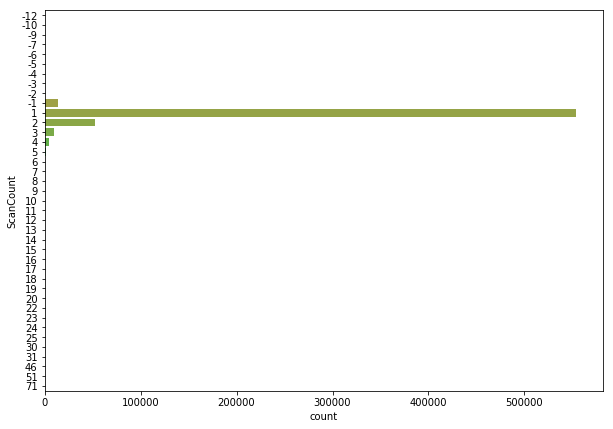

In [188]:
# Notice that ScanCount has got so many labels
# Graphically viewing the frequency of occurences if various scan count labels
plt.figure(figsize=(10, 7))
sns.countplot(y="ScanCount", data=Trip_data_dmy_v2)
plt.show()

In [189]:
# Notice that, apartfrom ScanCount -1, 1, 2, 3, 4, other ScanCount labels have very few records associated with them
# Directly merging the low frequence scancounts would mean information loss.
# If there was a way we could capture the ScanCount through a different or new feature, we must do that
# The only possible option is "DepartmentDescription", ofcourse the dummified ones. 
# If we multiply ScanCounts with "DepartmentDescription" after dummifying, we will have the ScanCount captured
# That should also help classify TripType more accurately

In [223]:
Trip_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy
0,999,5,5,68113152929,-1,FINANCIAL SERVICES,1000.0,0,0,1,0
1,30,7,5,60538815980,1,SHOES,8931.0,0,0,0,0
2,30,7,5,7410811099,1,PERSONAL CARE,4504.0,0,0,0,0
3,26,8,5,2238403510,2,PAINT AND ACCESSORIES,3565.0,0,0,0,0
4,26,8,5,2006613744,2,PAINT AND ACCESSORIES,1017.0,0,0,0,0


In [224]:
# There no better way but to dummify DepartmentDescription
dep_dummies = pd.get_dummies(Trip_data['DepartmentDescription'])
dep_dummies.head(3)

,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,PRODUCE,SEAFOOD,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
dep_dummies = dep_dummies.apply(lambda x: x*Trip_data['ScanCount'])

In [226]:
dep_dummies.tail(10)

,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,PRODUCE,SEAFOOD,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
647044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647051,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
647052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
Trip_data_dmy_v3= Trip_data.drop(["Upc","DepartmentDescription"], axis=1)

In [228]:
Trip_data_dmy_v3[dep_dummies.columns]=dep_dummies

In [229]:
Trip_data_dmy_v3.head(2)

,TripType,VisitNumber,Weekday,ScanCount,FinelineNumber,CustType,isWeekend,isReturn,bulkBuy,1-HR PHOTO,...,PRODUCE,SEAFOOD,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,5,5,-1,1000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,5,1,8931.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [230]:
# We have now captured the ScanCount information as part of Department Descriptions

In [221]:
# Trip_data_dmy_v3.loc[Trip_data_dmy_v3.ScanCount < -2] = -2
# Trip_data_dmy_v3.loc[Trip_data_dmy_v3.ScanCount > 5] = 5
# Trip_data_dmy_v3["ScanCount"].unique()

In [ ]:
# Observed that reducing the ScanCount label did not help

## Model Building: Round-3

In [231]:
X = Trip_data_dmy_v3.iloc[:,1:]
y = Trip_data_dmy_v3.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [232]:
forest_model_35_40 = RandomForestClassifier(criterion = "gini", max_depth=35, n_estimators=40)
forest_model_35_40.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=35, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
# Print Random Forest Model Accuracy on training data:
print(f'Random Forest Model with depth 35 and 40 Estimators -  Accuracy on training data: \
      {forest_model_35_40.score(X_train, y_train)}')

Random Forest Model with depth 35 and 40 Estimators -  Accuracy on training data:       0.8643949930458971


In [233]:
# Print Random Forest Model Accuracy on testing data:
print(f'Random Forest Model with depth 35 and 400 Estimators -  Accuracy on testing data: \
      {forest_model_35_40.score(X_test, y_test)}')

Random Forest Model with depth 35 and 400 Estimators -  Accuracy on testing data:       0.39127166109085443


In [ ]:
# Notice that there is just a marginal improvement

In [ ]:
# In this assignment, I just looked at the overall accuracy of the model, 
# and not granular error matrices such as Precision, Recall etc.

##### I tried running Gradient Boosting but is taking very long time, so could not furnish the output of it

In [213]:
# from sklearn.ensemble import GradientBoostingClassifier
# GB_model_35_20 = GradientBoostingClassifier( max_depth=35, n_estimators=30)
# GB_model_35_20.fit(X_train, y_train)

In [ ]:
# Print GB Model Accuracy on training data:
# print(f'GB Model with depth 45 -  Accuracy on training data: \
#       {GB_model_45.score(X_train, y_train)}')

In [ ]:
# Print GB Model Accuracy on testing data:
# print(f'GB Model with depth 45 -  Accuracy on testing data: \
#       {GB_model_35_20.score(X_test, y_test)}')

# Next Steps

### Data tuning approaches

In [ ]:
# There are so many Department Descriptions, many of them could be merged.
# Example- Mens-Wear and Menswear could be merged
# Other similar categories could be merged
# This could be the right approach as we are interested in properly classifying the TripType

In [ ]:
# In this dataset, each item purchased is represented as a record. 
# It would help a lot if we could create a feature containing number of items purchases in each trip

In [ ]:
# Class imbalanced treatment could help, possibly oversampling of minority classes

In [ ]:
# Further feature Engineering approaches would definitely help improve the model performance

### Model Tuning Approaches

In [ ]:
# Looking at different error metrics should also give some more insight on what is it that we are not classifying correctly
# Hyperparameter Tuning with GridSearch can help improve the model performance a little more
# Instead of Random Forest, Gradient boosting or XGBoost would definitely perform a lot better
# NeuralNets could also perform well in this dataset
# Other Ensemble models and stacking approaches should also help increase the model performance